In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats

## Data descriptions:
doi: 10.24432/C5002N
<br><br>AP (Ambient Pressure) Feature,	Continuous, (range 992.89-1033.30 milibar)	units:milibar
<br>RH	(Residual Humidity) Feature,	Continuous, (range 25.56% to 100.16%)	units:%
<br>AT	(Ambient Temperature) Feature,	Continuous,	(range 1.81°C and 37.11°C)	units: C
<br>V (Exhaust Vacuum)	Feature	Continuous (range 25.36-81.56 cm Hg)        	units: cm Hg
<br><br>PE	(Net hourly electrical output of the plant) Target,	Continuous,	(range 420.26-495.76 MW)	units:MW
 
<b><u>combined cycle power plant:</b></u>
<br>-electricity of the plant is generated by steam,gas turbines, and returned heat
<br>-the vacuum is colected from and has effect on the steam turbine
<br>-ambient variables affect gas turbine performance


## Project goal:
use environment features to predict net hourly electrical energy output of the plant (EP)

In [2]:
df = pd.read_csv('CombinedCyclePowerPlant.csv', sep=',')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


Text(0.5, 1.0, 'PE (target) hist')

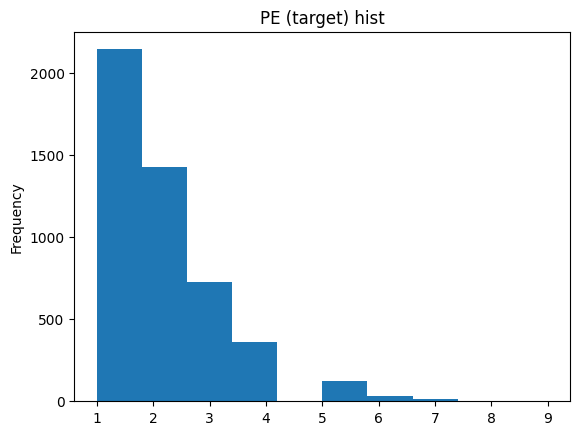

In [11]:
df['PE'].value_counts().plot(kind='hist')
plt.title('PE (target) hist')

Text(0.5, 1.0, 'AP hist')

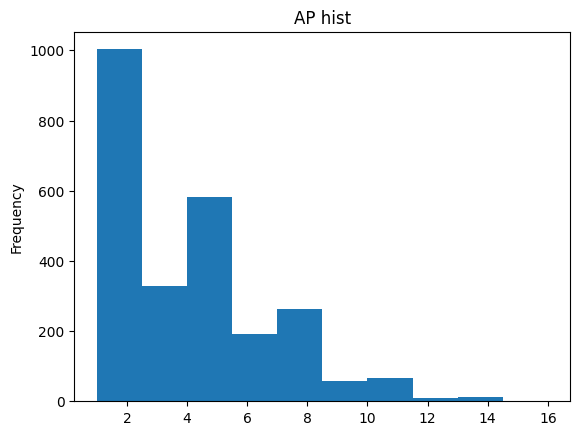

In [5]:
df['AP'].value_counts().plot(kind='hist')
plt.title('AP hist')

Text(0.5, 1.0, 'RH hist')

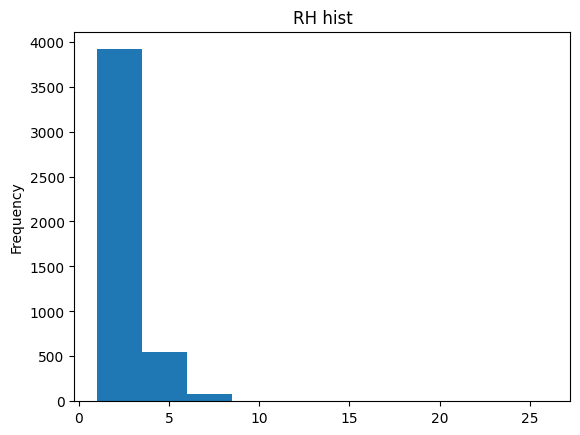

In [6]:
df['RH'].value_counts().plot(kind='hist')
plt.title('RH hist')

Text(0.5, 1.0, 'AT hist')

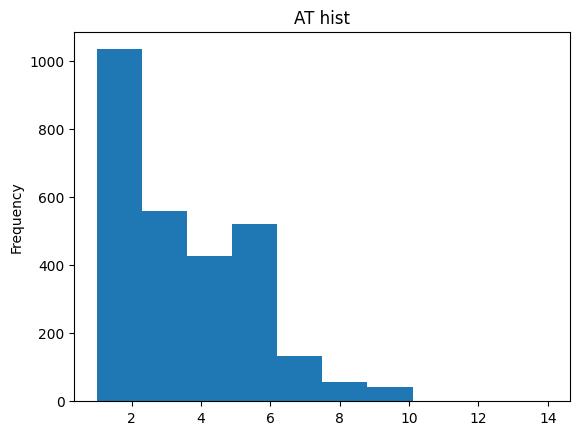

In [10]:
df['AT'].value_counts().plot(kind='hist')
plt.title('AT hist')

Text(0.5, 1.0, 'V hist')

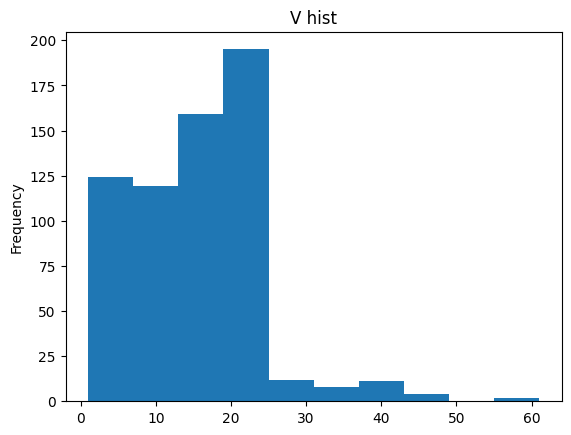

In [9]:
df['V'].value_counts().plot(kind='hist')
plt.title('V hist')

In [ ]:
df['RH'].value_counts().plot(kind='hist')
plt.title('RH hist')

In [7]:
df.isnull().describe()

,AT,V,AP,RH,PE
count,9568,9568,9568,9568,9568
unique,1,1,1,1,1
top,False,False,False,False,False
freq,9568,9568,9568,9568,9568


In [12]:
import wolta
wolta.data_tools.col_types(df)

['float64', 'float64', 'float64', 'float64', 'float64']

In [ ]:
# pearson correlation
df.corr(method='pearson')
plt.figure(figsize=(12,10))
cor = DataFile.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

AP and PE: 0.52 (moderate corr)
<br>RH and PE: 0.39 (weark/moderate corr)
<br> V = -0.87  (weak negative to no association to PE)
<br>AT = -0.95 (weak negative to no association to PE)

## AP vs PE (corr = 0.52)

In [ ]:
# Names
indep_name = 'AP'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[::50]
dep = df[dep_name].values[::50]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.capitalize()} compared to {dep_name.capitalize()}')

# Plot Independent variable
plt.plot(indep, color='b', alpha=0.6)
ax1.set_ylabel(indep_name.capitalize(), color='b')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.capitalize(), color='black')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 1000 and dep[i] > 460:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='green',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

## RH vs PE (corr = 0.39)

In [ ]:
# Names
indep_name = 'RH'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[::50]
dep = df[dep_name].values[::50]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.capitalize()} compared to {dep_name.capitalize()}')

# Plot Independent variable
plt.plot(indep, color='purple', alpha=0.6)
ax1.set_ylabel(indep_name.capitalize(), color='purple')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.capitalize(), color='black')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 70 and dep[i] > 460:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='green',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

### AT vs PE (corr: -0.95, weak negative to no correlation )

In [ ]:
# Names
indep_name = 'AT'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.capitalize()} compared to {dep_name.capitalize()}')

# Plot Independent variable
plt.plot(indep, color='brown', alpha=0.6)
ax1.set_ylabel(indep_name.capitalize(), color='brown')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.capitalize(), color='black')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 26 and dep[i] < 440:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='red',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

### V vs PE (corr -0.87, weak negative to no correlation )

In [ ]:
# Names
indep_name = 'V'
dep_name = 'PE'

# Values [start:stop:step size]
indep = df[indep_name].values[::50]
dep = df[dep_name].values[::50]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name.capitalize()} compared to {dep_name.capitalize()}')

# Plot Independent variable
plt.plot(indep, color='orange', alpha=0.6)
ax1.set_ylabel(indep_name.capitalize(), color='orange')
ax1.set_xlabel('Count of Observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='black', alpha=0.6)
ax2.set_ylabel(dep_name.capitalize(), color='black')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 40 and dep[i] < 440:  # Modify conditions as needed
        circle = plt.Circle(
            (i, dep[i]),
            0.5,
            color='red',
            fill=False,
            linewidth=2
)  
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep